In [1]:
import os
import sys
import random
from langchain_community.vectorstores import Chroma
from IPython.display import display, Markdown

current_dir = os.getcwd()
kit_dir = os.path.abspath(os.path.join(current_dir, ".."))
repo_dir = os.path.abspath(os.path.join(kit_dir, ".."))

sys.path.append(kit_dir)
sys.path.append(repo_dir)

from complex_rag.src.document_retrieval import DocumentRetrieval
from complex_rag.src.rag import COMPLEXRAG

CONFIG_PATH = os.path.join(kit_dir, "config.yaml")
PROMPTS_PATH = os.path.join(kit_dir, "prompts")

from datasets import load_dataset

rag_dataset = load_dataset("neural-bridge/rag-dataset-12000")
random.seed(123)
questions = rag_dataset["train"]["question"][:100]
answers = rag_dataset["train"]["answer"][:100]

/Users/codym/CAP/aisk_forked/ai-starter-kit/new_env2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-24 13:13:33,181 [INFO] - PyTorch version 2.3.0 available.


In [2]:
documentRetrieval = DocumentRetrieval()
*_, embedding_model_info, retrieval_info, _ = documentRetrieval.get_config_info()
embeddings = documentRetrieval.load_embedding_model()

2024-05-24 13:13:38,536 [INFO] - Load pretrained SentenceTransformer: intfloat/e5-large-v2


load INSTRUCTOR_Transformer


2024-05-24 13:13:40,999 [INFO] - Use pytorch device: cpu


max_seq_length  512


In [3]:
vectorstore = Chroma(
    persist_directory=kit_dir
    + "/data/rag_dataset_12000_train_100samples_1000_100.chromadb",
    embedding_function=embeddings,
)

2024-05-24 13:13:41,186 [INFO] - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


In [4]:
# instantiate rag
rag = COMPLEXRAG(
    config=CONFIG_PATH,
    prompts_path=PROMPTS_PATH,
    embeddings=embeddings,
    vectorstore=vectorstore,
)

# Initialize chains
rag.initialize()

# Build nodes
workflow = rag.create_rag_nodes()
print(workflow)

# Build graph
app = rag.build_rag_graph(workflow)

2024-05-24 13:13:42,263 [INFO] - Browser listening on: ws://127.0.0.1:49906/devtools/browser/9ea9fbc1-4004-4b23-b00d-8ad7f9f51488
2024-05-24 13:13:44,475 [INFO] - terminate chrome process...



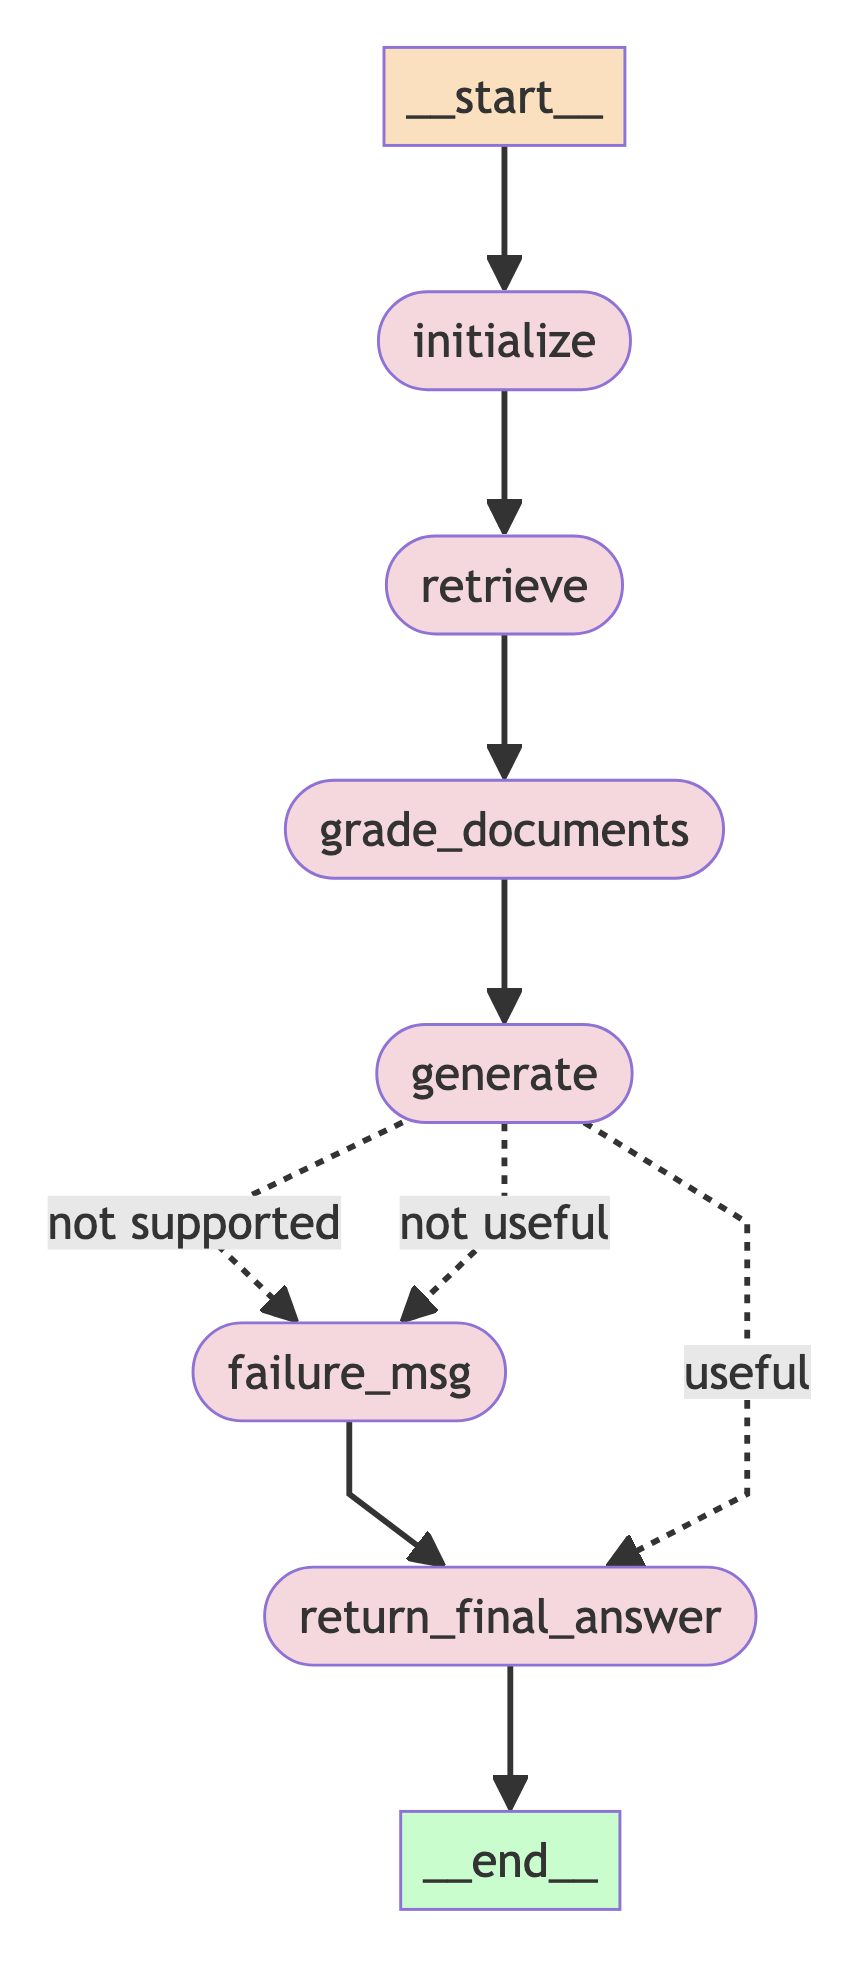

In [5]:
rag.display_graph(app)

In [6]:
idx = random.randint(0, len(questions))

response = rag.call_rag(app, question=questions[idx])

display(Markdown("---Response---"))
display(Markdown(response["answer"]))
display(Markdown("---Groud Truth---"))
display(Markdown(answers[idx]))

---Initializing---
How did Dan Foley feel about his portrayal on the Survivor TV show?
---RETRIEVING FOR QUESTION---
How did Dan Foley feel about his portrayal on the Survivor TV show?
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GENERATING---
---ANSWERING---
How did Dan Foley feel about his portrayal on the Survivor TV show?
---DOCS---
length:  1768
Dan Foley: My Survivor Portrayal Was Unfair
The latest castoff expresses his frustration about how he was portrayed on TV
Over a period of three days, multiple cameras film between 300-500 hours of footage. Then, a team of editors boil all that footage down to one 44-minute episode.
Dan Foley, the latest contestant voted off the island, says he watched the first two episodes and realized that he was going to get a villain’s edit. But even he seems surprised at how negatively he was portrayed – and how vitriolic the viewer response has been.
So

---Response---

Dan Foley felt that his portrayal on the Survivor TV show was unfair and that the editors "cherry-picked" footage to make him look bad. He also felt that the show did not show the context of the situations and that he was unfairly portrayed as a villain.

---Groud Truth---

Dan Foley expressed his frustration about his portrayal on the Survivor TV show, stating that he was portrayed negatively and was surprised at how vitriolic the viewer response has been.

In [7]:
idx = random.randint(0, len(questions))

response = rag.call_rag(app, question=questions[idx])

display(Markdown("---Response---"))
display(Markdown(response["answer"]))
display(Markdown("---Groud Truth---"))
display(Markdown(answers[idx]))

---Initializing---
What are the 5 ways to make your Mum's day special according to the context?
---RETRIEVING FOR QUESTION---
What are the 5 ways to make your Mum's day special according to the context?
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GENERATING---
---ANSWERING---
What are the 5 ways to make your Mum's day special according to the context?
---DOCS---
length:  1612
5 Ways To Totally Make Your Mums Day
Don't stress about what you need to buy for your mother's special occasion; for most Mum's the best present is your presence.
Yes it's that simple, just spend time with her, no store bought card, bunch of flowers or chocolates will warm her heart as much as any small efforts to show her how much she is appreciated.
To help here are 5 ideas to choose from which are sure to make your Mum feel special and happy.
1. As I mentioned presence is key, Mum was born before the information a

---Response---

To make your Mum's day special, you can spend quality time with her, go on a road trip together, create a homemade gift, do something you both love, or express your appreciation and love for her.

---Groud Truth---

The 5 ways to make your Mum's day special are: 1. Spend quality time with her and have a good old chat. 2. Go on a road trip together. 3. Make her a homemade gift such as a card, art piece, poem, story, movie, photo collage, or a playlist of her favorite songs. 4. Do something you love with your Mum like dance, yoga, art, cycling. 5. Tell her you love her, appreciate all she has done for you and that you value her wisdom.

In [8]:
idx = random.randint(0, len(questions))

response = rag.call_rag(app, question=questions[idx])

display(Markdown("---Response---"))
display(Markdown(response["answer"]))
display(Markdown("---Groud Truth---"))
display(Markdown(answers[idx]))

---Initializing---
What does the word 'quantum' mean as per the context?
---RETRIEVING FOR QUESTION---
What does the word 'quantum' mean as per the context?
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GENERATING---
---ANSWERING---
What does the word 'quantum' mean as per the context?
---DOCS---
length:  806
Wednesday’s word of the day, quantum (from Wordsmith.org) illustrates, in one word, my perception of time lately: there isn’t much of it.
Instead of crafting a quick story for a Wednesday’s Word post, I searched for a quote that might give color to the word. I found one that indirectly speaks to my desire to write and the courage it takes to keep me writing, even when the inspiration flickers out.
Today’s word:
quantum. noun.
1. A quantity or amount.
2. A portion.
3. A large amount.
4. The smallest amount of something that can exist independently.
, American business owner, career 

---Response---

In the given context, the word "quantum" refers to a small amount or a portion, as well as the smallest amount of something that can exist independently.

---Groud Truth---

The word 'quantum' means a quantity or amount, a portion, a large amount, or the smallest amount of something that can exist independently.

In [9]:
response = rag.call_rag(app, question="Why is there a monster truck in my driveway?")

display(Markdown("---Response---"))
display(Markdown(response["answer"]))

---Initializing---
Why is there a monster truck in my driveway?
---RETRIEVING FOR QUESTION---
Why is there a monster truck in my driveway?
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GENERATING---
---ANSWERING---
Why is there a monster truck in my driveway?
---DOCS---
length:  0

Could not find information.
---CHECK FOR HALLUCINATIONS---
---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS---
---FINAL ANSWER---


---Response---

I'm not sure why there is a monster truck in your driveway, but I can offer some suggestions to help you figure out what's going on. You might want to check with your neighbors to see if they know anything about the truck, or look for a permit or notice from your local government. You could also try searching online for information about monster truck events in your area or contacting local businesses to see if they're hosting an event. Finally, you might want to take a closer look around your property to see if there are any signs of recent activity.